In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
flights=pd.read_excel("E:DataSet/EastWestAirlines.xlsx")
flights.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
flights.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


### Quick EDA

In [6]:
import pandas_profiling as pp 

In [7]:
EDA_report=pp.ProfileReport(flights)
EDA_report.to_file(output_file="EDA_report.html") #the report can be found in the root folder

In [3]:
#creating a function to normalise the values
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [4]:
# normalising the values
flights_norm=norm_func(flights)
flights_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# Hierarchical Clustering

### Creating and plotting the Dendogram

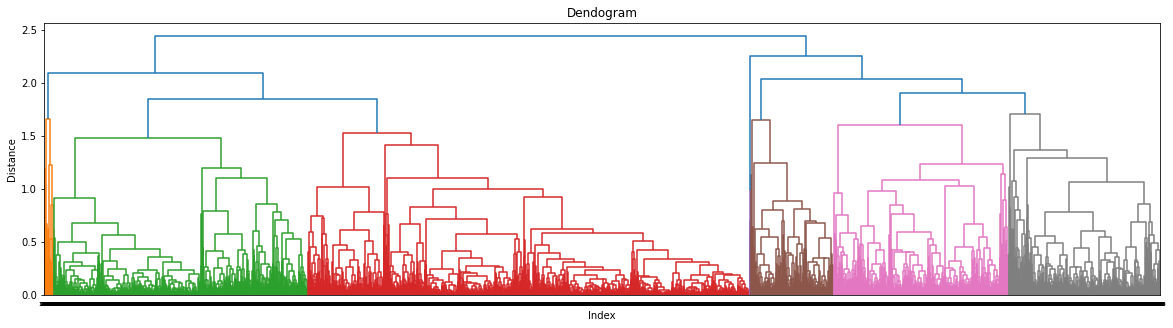

In [5]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
#we use complete linkage and euclidean distance
z=linkage(flights_norm,method="complete",metric="euclidean")
plt.figure(figsize=(20,5))
plt.title("Dendogram")
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(
     z,
    leaf_rotation=0,
)
plt.show()

### Creating clusters

In [7]:
from sklearn.cluster import AgglomerativeClustering
h_clustering=AgglomerativeClustering(n_clusters=5,linkage="complete",affinity="euclidean").fit(flights_norm)
cluster_labels=pd.Series(h_clustering.labels_)
cluster_labels
#flights["Clust"]=cluster_labels
#flights

0       1
1       1
2       1
3       1
4       0
       ..
3994    0
3995    0
3996    0
3997    1
3998    1
Length: 3999, dtype: int64

In [64]:
flights.iloc[:,1:].groupby(flights.Clust).mean() #grouping by cluster mean values

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters,Clust
Clust,,,,,,,,,,,,,
0,65100.941354,86.183192,2.012092,1.012092,1.012696,13801.498186,10.354293,218.047763,0.617291,2906.398428,0.0,3.328295,0.0
1,77710.549367,274.473418,1.434177,1.027848,1.007595,10606.243038,11.210127,871.120253,2.677215,4078.253165,1.0,2.000000,1.0
2,118863.698113,200.866473,4.074020,1.001451,1.030479,49828.551524,20.862119,780.963716,2.364296,5260.162554,1.0,0.000000,2.0
3,223573.500000,250.000000,1.000000,1.000000,1.000000,49057.500000,72.000000,21845.000000,53.000000,1822.500000,1.0,2.000000,3.0
4,49674.980324,90.319444,1.118056,1.017361,1.001157,3386.160880,6.824074,242.075231,0.719907,5570.855324,0.0,1.000000,4.0


In [66]:
from sklearn.metrics import silhouette_score
silhouette_score(flights_norm,cluster_labels)

0.6335196430085419

## KMeans Clustering

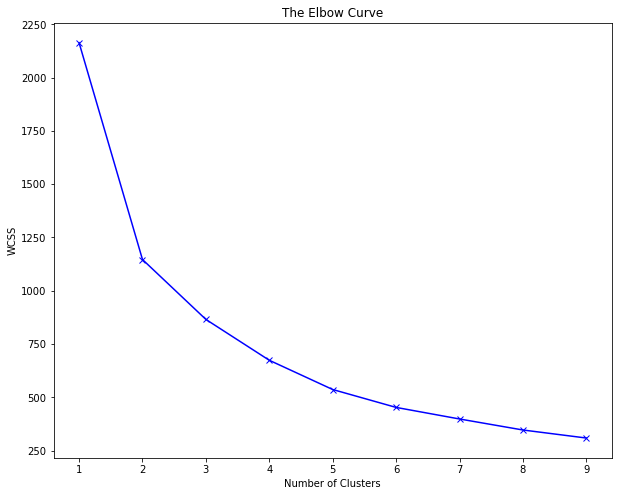

In [27]:
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(10,8))
WCSS=[]
for i in range(1,10):
    clf=KMeans(n_clusters=i)
    clf.fit(flights_norm)
    WCSS.append(clf.inertia_)
plt.plot(range(1,10),WCSS,'bx-')
plt.title("The Elbow Curve")
plt.ylabel("WCSS")
plt.xlabel("Number of Clusters")
plt.show()

In [28]:
#from the graph we can see that slope becomes 0 at n=5 thus we choose the number of clusters=5
clf=KMeans(n_clusters=5)
y_kmeans=clf.fit_predict(flights_norm)

In [55]:
y_kmeans#cluster labels

array([1, 1, 1, ..., 2, 3, 3])

In [32]:
flights['Clusters']=y_kmeans
flights #creating a column with the cluster labels

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


In [63]:
flights.iloc[:,1:].groupby(flights.Clusters).mean() #grouping by cluster values

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters,Clust
Clusters,,,,,,,,,,,,,
0,118863.698113,200.866473,4.074020,1.001451,1.030479,49828.551524,20.862119,780.963716,2.364296,5260.162554,1.0,0,2.000000
1,49674.980324,90.319444,1.118056,1.017361,1.001157,3386.160880,6.824074,242.075231,0.719907,5570.855324,0.0,1,4.000000
2,78078.890152,274.411616,1.433081,1.027778,1.007576,10703.342172,11.363636,924.084596,2.804293,4072.556818,1.0,2,1.005051
3,35385.638164,94.610261,1.204320,1.017102,1.006301,4400.907291,6.941494,214.288029,0.598560,1983.927093,0.0,3,0.000000
4,125899.655617,68.941068,3.664825,1.001842,1.025783,33035.488029,17.337017,225.740331,0.655617,4793.812155,0.0,4,0.000000


In [58]:
clf.inertia_

536.2041005668029

In [59]:
WCSS

[2164.1265977775024,
 1146.459517093534,
 865.2661583136107,
 673.4713799215663,
 536.2085069194483,
 452.2284305074109,
 397.9445893438363,
 346.22685211457525,
 308.51883537887727]

In [67]:
silhouette_score(flights_norm,y_kmeans)

0.6991722768573462

In [ ]:
#hence we see that KMeans clustering gives higher silhoutte score than Hierarchical clustering 
#thus we conclude that KMeans clustering performs better in this case.